In [26]:
# Cell 1: Importing Necessary Packages
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random


In [27]:
# Cell 2: Loading the Training and Testing Data from CSV

# Load CSV files
train_df = pd.read_csv("CIFR_train_data.csv")
test_df = pd.read_csv("CIFR_test_data.csv")


# Last column is the label, all previous columns are pixel values
x_train = train_df.iloc[:, :-1].values
y_train = train_df.iloc[:, -1].values

x_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].values

# Normalize images
x_train = x_train / 255.0
x_test = x_test / 255.0

# x_train = x_train[0]
# img_len, img_width = x_train.shape
# print('Size of input images:', img_len, 'x', img_width)


# Reshape images to 32x32x3 for Keras
x_train = x_train.reshape(-1, 32, 32, 3)
x_test = x_test.reshape(-1, 32, 32, 3)

In [28]:
# Cell 3: Define the Network Architecture Using Keras
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32,3)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax"),
])

model.summary()


C:\Users\vaish\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 394,634 (1.51 MB)

 Trainable params: 394,634 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Cell 4: Train the Model Using SGD
model.compile(optimizer="sgd",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(x_train,
                    y_train,
                    validation_data=(x_test, y_test),
                    epochs=10)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.3259 - loss: 1.8904 - val_accuracy: 0.3595 - val_loss: 1.7858
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.3949 - loss: 1.7150 - val_accuracy: 0.4111 - val_loss: 1.6746
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.4255 - loss: 1.6392 - val_accuracy: 0.4135 - val_loss: 1.6354
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.4410 - loss: 1.5902 - val_accuracy: 0.4429 - val_loss: 1.5725
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4558 - loss: 1.5545 - val_accuracy: 0.4403 - val_loss: 1.5715
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4664 - loss: 1.5223 - val_accuracy: 0.4455 - val_loss: 1.5490
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4769 - loss: 1.4971 - val_accuracy: 0.4665 - val_loss: 1.5087
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4856 - loss: 1.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4782 - loss: 1.4811
Loss: 1.481
Accuracy: 0.478


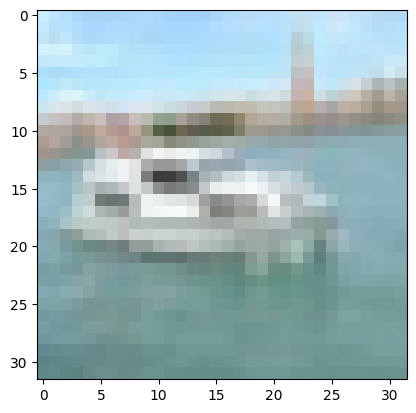

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step  


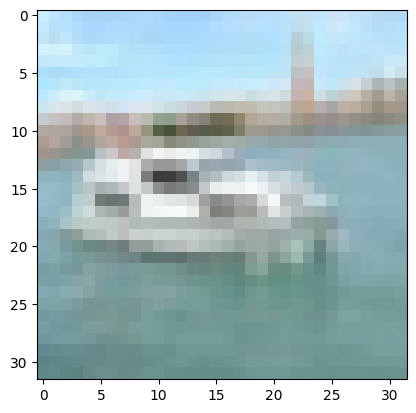

Predicted Value : 8


In [34]:
# Cell 5: Evaluate the Network
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Loss: {test_loss:.3f}")
print(f"Accuracy: {test_acc:.3f}")

n = random.randint(0, x_test.shape[0] - 1)
plt.imshow(x_test[n], cmap="gray")
plt.show()

predicted_value = model.predict(x_test)
plt.imshow(x_test[n], cmap="gray")
plt.show()
print("Predicted Value :", np.argmax(predicted_value[n]))


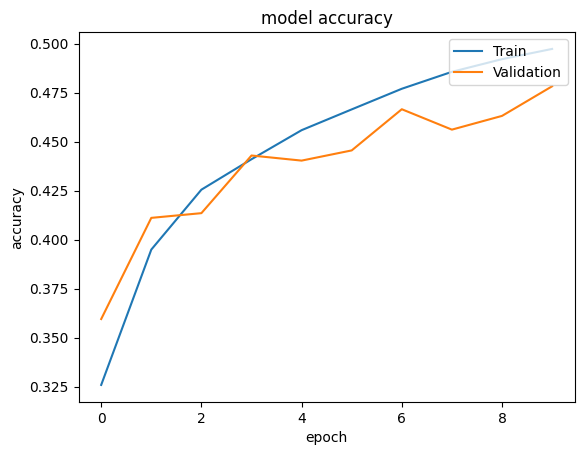

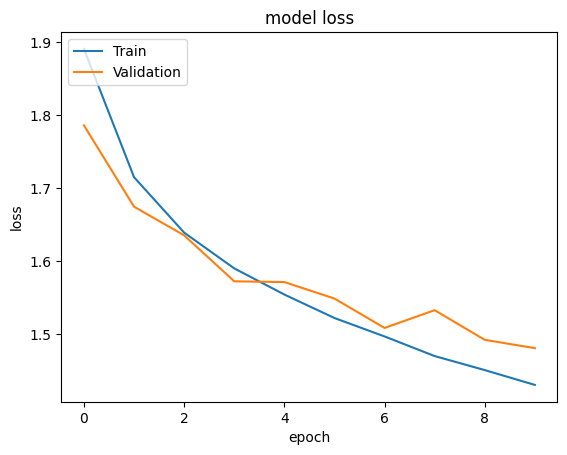

In [31]:
# Cell 6: Plot the Training Loss and Accuracy

# Plotting The Training Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plotting The Training Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
